In [1]:
"""
@author: mahmud
"""
from netCDF4 import Dataset
import os
#os.environ['PROJ_LIB']="/Users/mahmud/opt/anaconda3/share/proj"
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from glob import glob, glob1
import xarray as xr
import sys
import time
import datetime
import pandas as pd
import scipy 
import scipy.stats
import ipywidgets as widgets
from IPython.display import display
sys.path.insert(0,"/work/cmcc/mg13420/plot_exercises/jup_nbooks/method_function/")
from file_directory import*
from climatology_anomaly import*
from stats_functions import*
os.system("hostname") 
import statsmodels.tsa.seasonal as tsa 

/work/cmcc/mg13420/plot_exercises/jup_nbooks/method_function/file_directory.py
n165.cmn.juno.cmcc.scc


In [2]:
# function for string yr input reading 
def  get_inputs():
    yrlist=yrList.value.split(',')
    ytrlist= [int(year.strip()) for year in yrlist]
    return yrlist 
#yrlist = get_inputs()

yr_list1= widgets.Dropdown( options=[int(i) for i in range(2015, 2024)],  value=2022, description='Year_start', dsiable=False)
yr_list2= widgets.Dropdown( options=[int(i) for i in range(2015, 2024)],  value=2023, description='Year_end', dsiable=False)
source_tab=widgets.Tab([widgets.VBox([yr_list1,yr_list2])]) 
display(source_tab)
# pre-defined years printing, 
print(yr_list1.value)
print(yr_list2.value)

2022
2023


In [5]:

def grid_points(arr,gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8 , plot=False):
    loc1 = arr.sel(lat=gp1[1], lon=gp1[0], method='nearest').to_series()
    loc2 = arr.sel(lat=gp2[1], lon=gp2[0], method='nearest').to_series()
    loc3 = arr.sel(lat=gp3[1], lon=gp3[0], method='nearest').to_series()
    loc4 = arr.sel(lat=gp4[1], lon=gp4[0], method='nearest').to_series()
    loc5 = arr.sel(lat=gp5[1], lon=gp5[0], method='nearest').to_series() 
    loc6 = arr.sel(lat=gp6[1], lon=gp6[0], method='nearest').to_series() 
    loc7= arr.sel(lat=gp7[1], lon=gp7[0], method='nearest').to_series() 
    loc8= arr.sel(lat=gp8[1], lon=gp8[0], method='nearest').to_series()
    
    loc_list =[loc1, loc2, loc3, loc4, loc5, loc6, loc7, loc8]
    # checking time series plot
    loc_names = [
    'Atlantic-1', 'Atlantic-2', 'Atlantic-3', 'Atlantic-4',
    'B. Biscay-1', 'B. Biscay-2', 'Alboran Sea', 'North Sea']

    if plot:
        plt.figure(figsize=(15,3))
        dt=pd.date_range(start='2018-01-01', end='2023-12-31',freq='D')
        dt1= dt[::7]
        for i in range(8): 
            #plt.plot(dt1)
            plt.plot(dt1, loc_list[i], label=loc_names[i])
            i+=1 
            #plt.plot(loc_list[i], label=loc_names[i])
        #plt.title("Single Grid point time series-Analysed SST anomaly 7-day minimium values") 
        plt.legend(loc='lower left', ncol=8)
        plt.ylabel("[K]" ) 
        path="/work/cmcc/mg13420/plot_exercises/sst_pdf-exps/sst-pdf_figs/"
        #plt.savefig(path+"analysed_sst_min_gridpoints_2018_2023.jpeg", dpi=200)
        #plt.savefig(path+"analysed_sst_anom_gridpoints_2018_2023.jpeg", dpi=200)
        
    return loc_list 

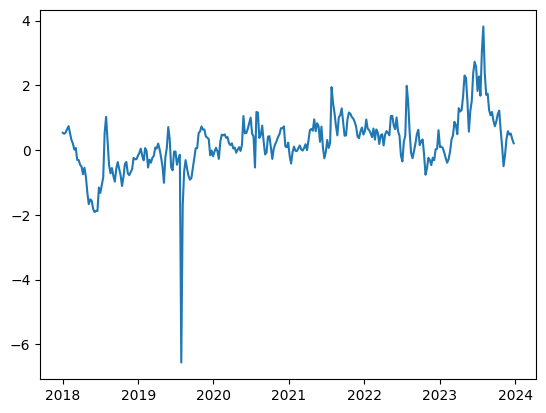

In [69]:
dt=pd.date_range(start='2018-01-01', end='2023-12-31',freq='D')
d=dt[::7]
plt.plot(d, max_list[0],label="test")

In [4]:
#--- Reading Input files from input years range 

# Change with local target path/directory/ for input files

#files_dir="/data/cmcc/mg13420/sst_data/sst_IBI_0.05deg/"
files_dir="/data/cmcc/mg13420/sst_data/obs_sst_IBI_0.05deg/"

atm_comb=  target_years_files(files_dir, yr_list1.value, yr_list2.value, 1, 12, target_files='sst', era5_file=None)
    
#atm_comb=  input_yr_files(files_dir,in_yr, end_yr, 'sst', None)
print("var_data", len(atm_comb['time']))

with xr.open_dataset(glob(files_dir+"*.nc")[0]) as ds0:
    #print("single file", ds0[input_var].shape)
    longitude = ds0["lon"][:] 
    latitude  = ds0["lat"] 
    # crd_lon =ds0.variables["longitude"][:] 
    # crd_lat = ds0.variables["latitude"][:] 
    crd_lon =ds0.variables["lon"][:] 
    crd_lat = ds0.variables["lat"][:] 
    
    nlon = len(crd_lon)
    nlat = len(crd_lat)

   
    if 'time' in ds0.variables:
        time_step = ds0.variables["time"]
    if 'step' in ds0.variables:
        time_step = ds0.variables["step"][:]

    if 'depth' in ds0.variables:
        depth = ds0.variables["depth"][0]
        print("Depth level=",depth.values) 
    else:
        depth = None
    
    nday= len(atm_comb['time'])*len(time_step)
    nday1= len(atm_comb['time'][:])
    crd_time=range(nday1)      
    print("Length of target time series=",nday1)
    print(nday, nlat, nlon)
#--- Passing input variable to the worker function 
sst= atm_comb['analysed_sst'][:,:,:]  
#sst= atm_comb['thetao'][:,0,:,:]
#sst = xr.DataArray(sst, dims=['time','latitude','longitude'], coords=[atm_comb['time'][:8], latitude, longitude]) 
sst = xr.DataArray(sst, dims=['time','lat','lon'], coords=[atm_comb['time'][:], latitude, longitude]) 

# select particular lat lon grid points using lat lon values from sst 

# choose  your grid points for the time series 
natl1 = [-13, 41]
natl2=  [-9.9, 41.2]
natl3 = [-12.1, 38.8] 
natl4 = [-9.6, 37.6]
biscay1 = [-6.23, 44.] 
biscay2 =[-3.3, 46.6]
alboran= [-3.3, 35.9]
ns=    [3.5, 54.1]

# for varialbe time series
# var_grids_list = grid_points(sst,natl1, natl2, natl3, natl4, biscay1, biscay2, alboran, ns, plot=True)
# np.shape(var_grids_list)
 

yr-month= ['201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212', '202301', '202302', '202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312']
/data/cmcc/mg13420/sst_data/obs_sst_IBI_0.05deg/20180101.nc
/data/cmcc/mg13420/sst_data/obs_sst_IBI_0.05deg/20231231.nc
var_data 2191
Length of target time series= 2191
2191 601 461


In [6]:

# natl1 = [-10, 41]
# natl2=  [-9, 41.2]
# natl3 = [-12.1, 38.8] 
# natl4 = [-9.6, 35.6]
# bis1 = [-3, 39] 
# bis2 =[-3.3, 46.6]
# alboran= [-3.3, 35.9]
# ns=      [3., 52.1]

# # for varialbe time series
# var_grids_list = grid_points(sst,natl1, natl2, natl3, natl4, biscay1, biscay2, alboran, ns, plot=False)
# np.shape(var_grids_list)

## For anomlay time series 

mmean_sst= sst.groupby('time.dayofyear').mean('time')
anom_sst= sst.groupby('time.dayofyear')-mmean_sst
anom_grids_list= grid_points(anom_sst, natl1, natl2, natl3, natl4, biscay1, biscay2, alboran, ns, plot=False )
anom_grids_list = [np.array(elem, dtype=np.float16) for elem in anom_grids_list]

np.shape(anom_grids_list)


(8, 2191)

In [7]:
# decomposing to retreive the residual time series

# resid_list =[] 
# for i in range(8):
#     result= tsa.seasonal_decompose(var_grids_list[i], model='additive', period =7)
#     #trend= result.trend
#     #season =result.seasonal
#     resid= result.resid
#     resid_list.append(resid) 
#     i+=1
#resid_list[0].values

#plt.plot(resid_list[0])
#Ignoring the nan values for resid_list

sst_list =[] 
for j in range(8):
    ssl = [] 
    #for i in range(len(resid_list[0])):
    for i in range(len(anom_grids_list[0])): 
        #if  np.isfinite(resid_list[j][i]):
        if  np.isfinite(anom_grids_list[j][i]).all(): 
            #ssl.append(resid_list[j][i]) 
            ssl.append(anom_grids_list[j][i]) 
    sst_list.append(ssl)

for i in range(8):
    if np.isnan(sst_list[i]).all():
        print("nan present")
    else : 
        print("no nan") 
        #print(np.shape(sst_list))
    #sst_list= np.array(sst_list)
(anom_grids_list[0])

no nan
no nan
no nan
no nan
no nan
no nan
no nan
no nan


array([ 0.1866 ,  0.4233 ,  0.4683 , ...,  0.09   ,  0.04166, -0.145  ],
      dtype=float16)

(313, 601, 461)


/work/cmcc/mg13420/.conda/envs/gpu/lib/python3.11/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


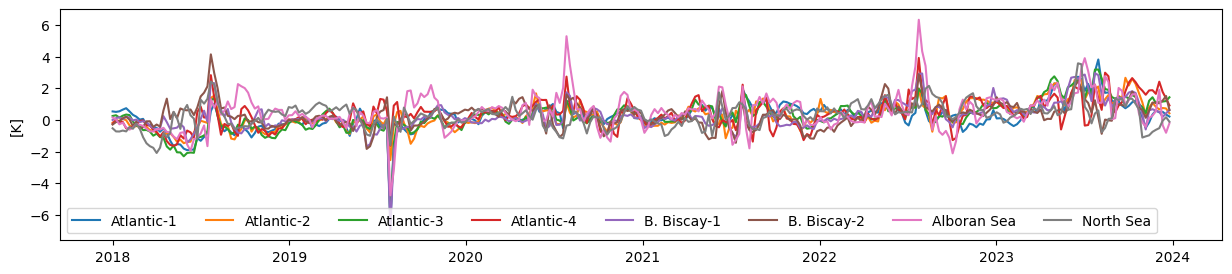

In [8]:
def extremes_max(xarr):
    dt=pd.date_range(start='2018-01-01', end='2023-12-31',freq='D')
    ds_xarr= xr.DataArray(xarr,dims=['time','lat','lon'], coords=dict(time=dt))
    ds_extr =ds_xarr.resample(time='7D').max('time')
    return ds_extr     
 
def extremes_min(xarr):
    dt=pd.date_range(start='2018-01-01', end='2023-12-31',freq='D')
    ds_xarr= xr.DataArray(xarr,dims=['time','lat','lon'], coords=dict(time=dt))
    ds_extr1 =ds_xarr.resample(time='7D').min('time')
    return ds_extr1     
 

# -- anomaly and extreme time series
# flux_anom1= anom_tseries(sh1) 
# flux_anom2= anom_tseries(lh1)
sst_max= extremes_max(anom_sst) 
sst_min= extremes_min(anom_sst) 

print(np.shape(sst_max))
ntime = range(len(sst_max))
sst_max=xr.DataArray(sst_max,dims=['time','lat','lon'], coords=[ntime, latitude, longitude])
sst_min=xr.DataArray(sst_min,dims=['time','lat','lon'], coords=[ntime, latitude, longitude])

max_list = grid_points(sst_max, natl1, natl2, natl3, natl4, biscay1, biscay2, alboran, ns, plot= True)


(313, 601, 461)


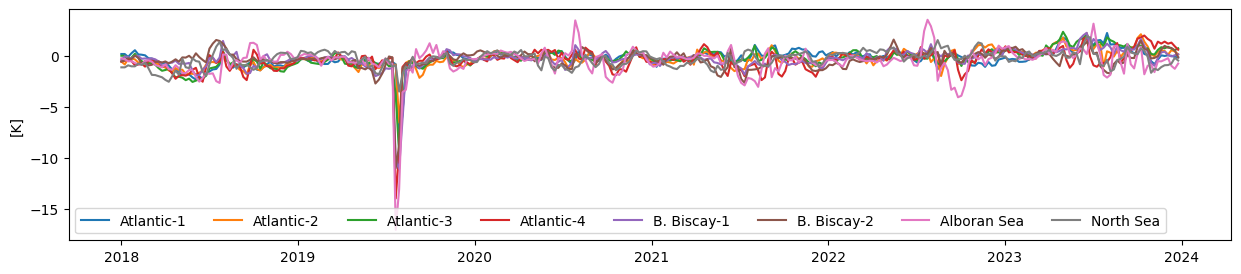

In [9]:
print(np.shape(sst_min))
min_list= grid_points(sst_min, natl1, natl2, natl3, natl4, biscay1, biscay2, alboran, ns, plot=True )

(8, 2190)
(8, 313)
(1056,)
0 , (1032,)
1 , (1056,)
2 , (1064,)
3 , (1119,)
4 , (986,)
5 , (1031,)
6 , (1164,)
7 , (1054,)


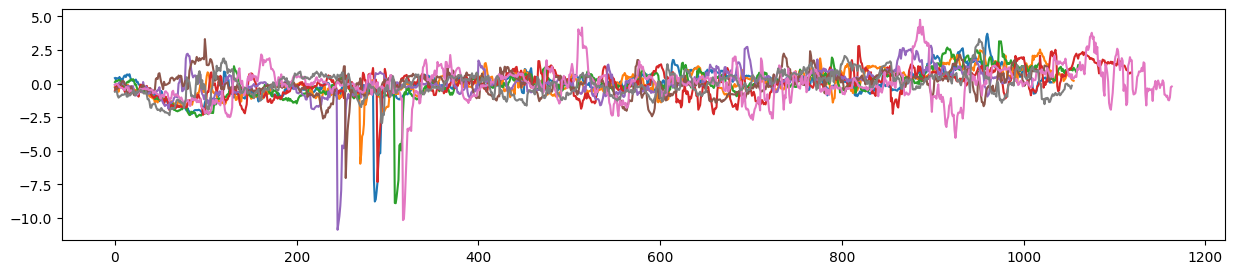

In [40]:
target_list = np.array(sst_list, dtype=np.float16)
print(np.shape(sst_list))
dupli_list=  np.array(max_list, dtype=np.float16)
dupli_list1=  np.array(min_list, dtype=np.float16)

excld_list = [] 
for i in range(8):
    t=[x for x in target_list[i] if x not in dupli_list[i]]  
    #t=np.array(list(itertools.compress(target_list[i], [i not  in dupli_list[i] for i in range(len(anom_list1[i]))])))
    excld_list.append(t)

excld_list1 = [] 
for i in range(8):
    u=[y for y in excld_list[i] if y not in dupli_list1[i]] 
    excld_list1.append(u)

print(np.shape(dupli_list))
print(np.shape(excld_list1[1]))

for i, elm in enumerate(excld_list1):
    print(f"{i} , {np.shape(elm)}")


plt.figure(figsize=(15,3))
for j in range(8):
    plt.plot(excld_list1[j]) 


/users_home/cmcc/mg13420/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1084: RuntimeWarning: overflow encountered in divide
  rel_diff = xp.max(xp.abs(a_zero_mean), axis=axis,


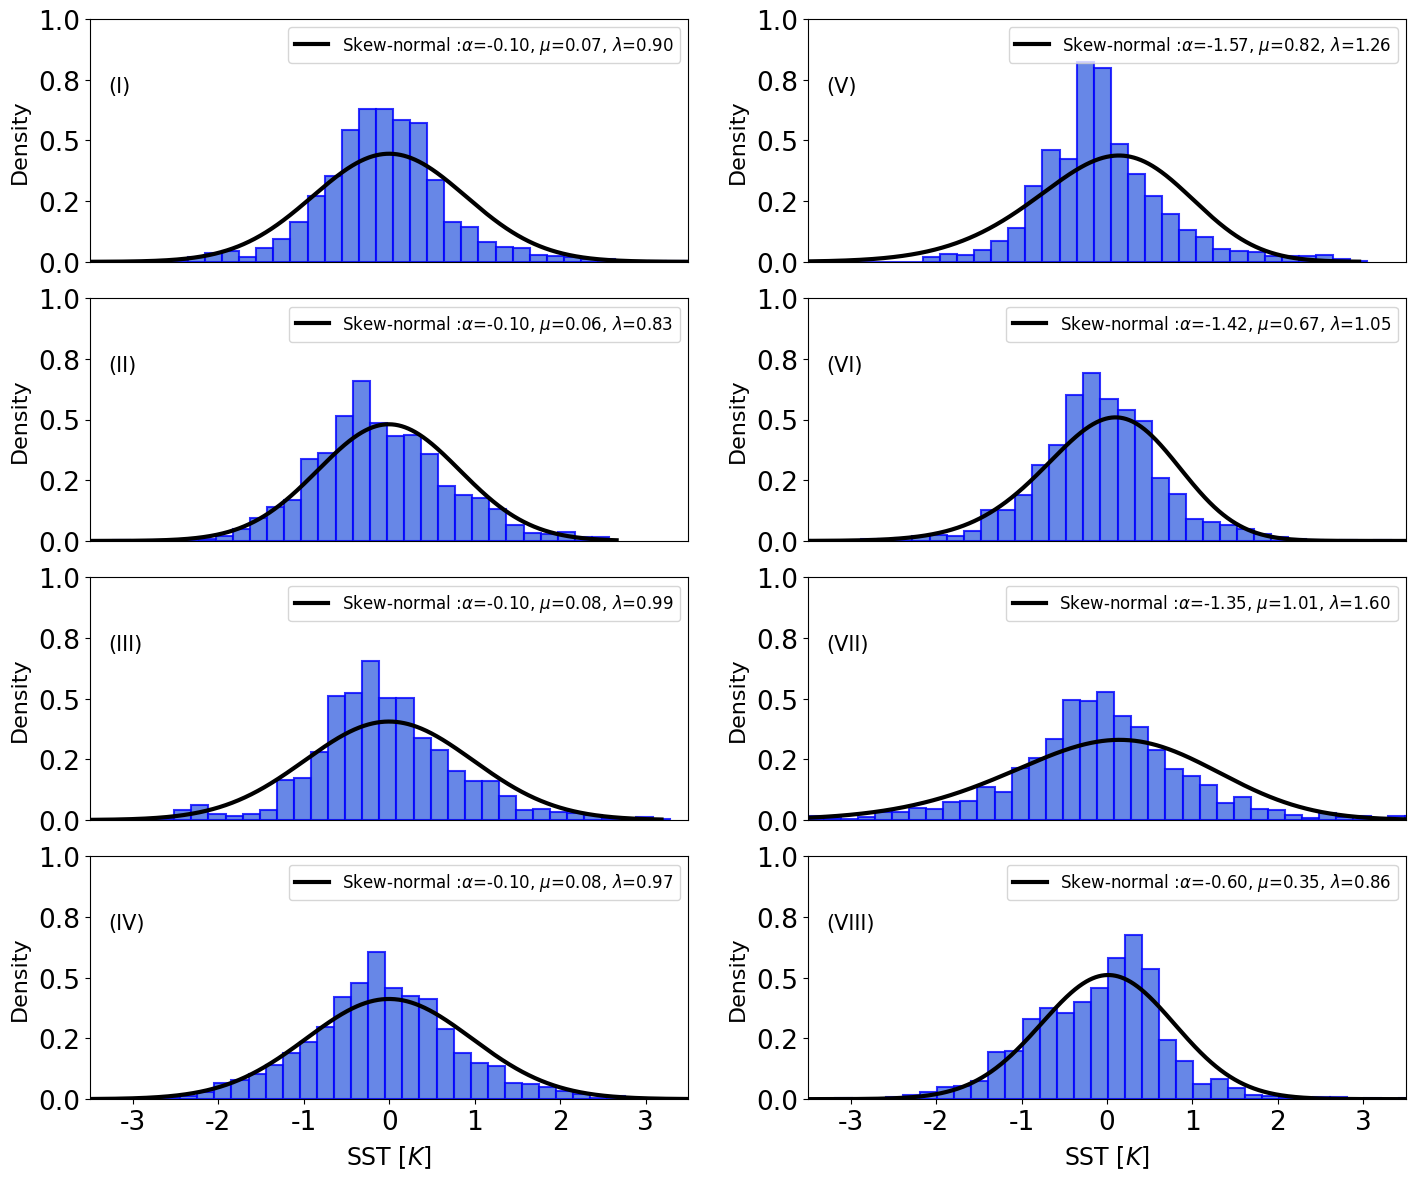

Plot_done= 2.156799793243408


In [125]:

import scipy.stats as ss
from matplotlib import ticker 
start =time.time()


plot_info =[ "Sea water temeprature  [K]" ]

plt_id= ["(a)", "(b)", "(c)", "(d)", "(e)","(f)","(g)", "(h)"] 
plt_id= ["(I)", "(II)", "(III)", "(IV)", "(V)","(VI)","(VII)", "(VIII)"] 
sea = ["Alboran Sea, ","Gulf of Lion, ","Tyrrhenian Sea, ","Sicily Strait, ","Adriatic Sea, ", "Ionian Sea, ", "Agean Sea, ", " Levantine Sea "]

plt_id1= ["(I)", "(II)", "(III)", "(IV)",] #  ["(a)", "(b)", "(c)", "(d)"]
plt_id2= ["(V)","(VI)","(VII)", "(VIII)"]  # ["(e)","(f)","(g)", "(h)"] 

plt_id3= ["(i)", "(j)", "(k)", "(l)"]
plt_id4= [ "(m)","(n)","(o)", "(p)"] 

#var_nm1= "SST [${\circ}C$]"
var_nm1= "SST [${K}$]"

column1_list= sst_list[:4]
column2_list= sst_list[4:]
# column1_list= anom_grids_list[:4]
# column2_list= anom_grids_list[4:]

# column1_list= (excld_list1[:4])
# column2_list= (excld_list1[4:])
#get_ipython().run_line_magic('line')

def plot_hist(var_list1,var_list2, nplot, ncol,fig_size,x_label1, pdf=None, pdf_name=None, title1=None, title2=None, rwidth=None, edgcol=None):
    import os
    os.environ['PROJ_LIB']="/Users/mahmud/opt/anaconda3/share/proj"
    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt
    (fig,ax)= plt.subplots(nplot,ncol, gridspec_kw={'width_ratios':[1,1,]}, constrained_layout=False)
    fig.set_size_inches(fig_size)

    for iplot in range(nplot):
        for zplot in range(ncol):
            xmin=-3.5
            xmax=3.5
            ymin=0
            ymax= 1.
            xmin2=-2.5
            xmax2 =2.5
            ymin1=0.0
            ymax1= 1.
        
            if zplot==0:
                pdf_dist= getattr(ss,pdf)
                
                # xmin = min(xmin, min(var_list1[iplot]))
                # xmax = max(xmax, max(var_list1[iplot]))
                bin_width= 0.2
                bins = np.arange(np.nanmin(var_list1[iplot]), np.nanmax(var_list1[iplot])+ bin_width ,bin_width)
                hst, bin_edges =np.histogram(var_list1[iplot], bins=bins, density= True) 
                ax[iplot][zplot].bar(bin_edges[:-1], hst, width=bin_width, alpha=0.8, color='royalblue', edgecolor='blue', linewidth=1.5) 
                #hst=ax[iplot][zplot].hist(var_list1[iplot],bins=25, alpha= 0.8, density=True, linestyle=('solid'),rwidth=rwidth, edgecolor=edgcol, histtype="barstacked",color='royalblue' )
                
                # ymin = min(ymin, min(hst[0]))
                # ymax= max(ymax, max(hst[0]))
                
                if (pdf=="skewnorm"):
                    # --Skew Normal PDF distr. -- #
                    data_sort = np.sort(var_list1[iplot])
                    N= len(data_sort)
                    y= np.arange(N)/float(N)
                
                    sk_norm_param=pdf_dist.fit(var_list1[iplot], -0.1 ) #loc=-0.5 for d2m
                    kappa=sk_norm_param[0]
                    loc=sk_norm_param[1]
                    lam=sk_norm_param[2]
                    s=np.linspace(np.min(var_list1[iplot]), np.max(var_list1[iplot]),num=len(var_list1[iplot]), endpoint=True)
                    #sk_cdf= pdf_dist.cdf(s,*sk_norm_param)
                
                    sk_normal=pdf_dist.pdf(s,*sk_norm_param)
                    #ax[iplot][zplot].plot(s, sk_cdf, '-g', label= "{}".format(pdf_name)+ ":" '' r"$\kappa$=%.2f, $\mu$=%.2f, $\lambda$=%.2f"%(kappa, loc, lam))
                    ax[iplot][zplot].plot(s, sk_normal, 'black', linewidth=3, label= "{}".format(pdf_name)+ ":" '' r"$\alpha$=%.2f, $\mu$=%.2f, $\lambda$=%.2f"%(kappa, loc, lam)) 
                     #ax[iplot][zplot].plot(s, sk_normal, '-g', label= "{}".format(pdf_name)+ ":" '' r"$\kappa$=%.2f, $\mu$=%.2f"%(kappa, loc)) #, lam
                    #ax[iplot][zplot].plot(data_sort, y, 'k--') 

           #  -- Weibull/Exp. Weibull PDF distr. loc=floc=0 , scale=f0=1 for Weibull,but for Exponential Weibull, only loc=floc, no scale parameter 
                if (pdf=="weibull_min"):
                    wb_params = scipy.stats.weibull_min.fit(var_list1[iplot],loc=0.1) 
                    z=np.linspace(var_list1[iplot].min(), var_list1[iplot].max(),num=len(var_list1[iplot]), endpoint=False)
                    weib = scipy.stats.weibull_min.pdf(z, *wb_params)
                    #alpha2 = wb_params[0]
                    kappa = wb_params[0]
                    #loc2 = wb_params[2] 
                    lam=  wb_params[1]
                    #ax[iplot][zplot].plot(z, weib, '-r', label="Weibull PDF:" + " " r'$\alpha$=%.2f, $\kappa$=%.2f, $\lambda$=%.2f'%(alpha2,kappa, lam))  #$\alpha$=%.2f,
                    ax[iplot][zplot].plot(z, weib, 'black', label="Weibull PDF:" + " " r'$\kappa$=%.2f, $\lambda$=%.2f'%(kappa, lam))  #$\alpha$=%.2f,
                
                if (pdf=="laplace"):
                    # -laplace Normal PDF distr. -- #
                    laplace_param=scipy.stats.laplace_asymmetric.fit(var_list1[iplot], 0.1)
                    alpha=laplace_param[0]
                    miu= laplace_param[1]
                    sigma= laplace_param[2]
                    lap=np.linspace( np.min(var_list1[iplot]),np.max(var_list1[iplot]),num=len(var_list1[iplot]), endpoint=True)
                    #r_range=[0, 0.40]
                    laplace_pdf=scipy.stats.laplace_asymmetric.pdf(lap, *laplace_param)
                    ax[iplot][zplot].plot(lap, laplace_pdf, '-g', label= "ASL PDF: " '' r"$\alpha$=%.2f, $\mu$=%.2f, $\sigma$=%.2f"%(alpha, miu, sigma))

                #ax[iplot][zplot].tick_params(axis='x', length=2, reset=False  )
                ax[iplot][zplot].set_ylim(ymin,ymax)  
                ax[iplot][zplot].set_xlim(xmin, xmax)  
                #ax[iplot][zplot].set_title(sea[iplot]+ "(lat, lon)=("+str(sea_8locs[iplot][1])+", "+str(sea_8locs[iplot][0])+")", fontsize=14)
                ax[iplot][zplot].text(0.03, 0.7, plt_id1[iplot],transform= ax[iplot][zplot].transAxes , fontsize= 15)#ax[iplot][zplot].set_xlabel(x_label, size='13')
                #ax[iplot][zplot].set_ylabel("Density", size ='15', labelpad=8 )
                ax[3][zplot].set_xlabel(x_label1, size='17',labelpad=6)
                #ax[iplot][zplot].legend(fontsize=15)
                ax[iplot][zplot].legend(facecolor='inherit', fontsize=12, loc="upper right")
                #ax[iplot][zplot].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
                
              
                ax[iplot][zplot].xaxis.set_visible(False)
                #ax[iplot][zplot].set_xticklabels(xlabel)

            if zplot==1:
                
                pdf_dist= getattr(ss,pdf)
                # xmin = min(xmin, np.min(var_list2[iplot]))
                # xmax = max(xmax, np.max(var_list2[iplot]))
                bin_width= 0.2
                bins = np.arange(np.nanmin(var_list2[iplot]), np.nanmax(var_list2[iplot])+ bin_width ,bin_width)
                hst1, bin_edges =np.histogram(var_list2[iplot], bins=bins, density= True) 
                ax[iplot][zplot].bar(bin_edges[:-1], hst1, width=bin_width, alpha=0.8, color='royalblue', edgecolor='blue', linewidth=1.5) 
                #hst=ax[iplot][zplot].hist(var_list2[iplot], bins=25, alpha= 0.8, linestyle=('solid'),rwidth=rwidth, edgecolor=edgcol,density=True, color='royalblue' )
               
                # ymin = min(ymin, min(hst[0]))
                # ymax= max(ymax, max(hst[0]))
                # --Skew Normal PDF distr. -- #
                if (pdf=="skewnorm"):
                    
                    data_sort = np.sort(var_list2[iplot])
                    N= len(data_sort)
                    y= np.arange(N)/float(N)
                    sk_norm_param=pdf_dist.fit(var_list2[iplot],)
                    kappa=sk_norm_param[0]
                    loc=sk_norm_param[1]
                    lam=sk_norm_param[2]
                    s=np.linspace(np.min(var_list2[iplot]), np.max(var_list2[iplot]),num=len(var_list2[iplot]), endpoint=False)
                
                    sk_normal=pdf_dist.pdf(s,*sk_norm_param)
                    ax[iplot][zplot].plot(s, sk_normal,'black', linewidth=3, label= "{}".format(pdf_name)+ ":" '' r"$\alpha$=%.2f, $\mu$=%.2f, $\lambda$=%.2f"%(kappa, loc, lam)) #, lam
                
                if (pdf=="weibull_min"):
                    wb_params = scipy.stats.weibull_min.fit(var_list2[iplot],loc=0) 
                    z=np.linspace(var_list2[iplot].min(), var_list2[iplot].max(),num=len(var_list2[iplot]), endpoint=True)
                    weib = scipy.stats.weibull_min.pdf(z, *wb_params)
                    #alpha2 = wb_params[0]
                    kappa = wb_params[0]
                    #loc2 = wb_params[2] 
                    lam=  wb_params[1]
                    #ax[iplot][zplot].plot(z, weib, '-r', label="Weibull PDF:" + " " r'$\alpha$=%.2f, $\kappa$=%.2f, $\lambda$=%.2f'%(alpha2,kappa, lam))  #$\alpha$=%.2f,
                    ax[iplot][zplot].plot(z, weib, 'black', label="Weibull PDF:" + " " r'$\kappa$=%.2f, $\lambda$=%.2f'%(kappa, lam))  #$\alpha$=%.2f,
       
                if (pdf=="laplace"):
                    # -laplace Normal PDF distr. -- #
                    laplace_param=scipy.stats.laplace_asymmetric.fit(var_list2[iplot],0.01)
                    alpha=laplace_param[0]
                    miu= laplace_param[1]
                    sigma= laplace_param[2]
                    lap=np.linspace(np.min(var_list1[iplot]), np.max(var_list2[iplot]),num=len(var_list2[iplot]), endpoint=True)
                    #r_range=[0, 0.40]
                    laplace_pdf=scipy.stats.laplace_asymmetric.pdf(lap, *laplace_param)
                    ax[iplot][zplot].plot(lap, laplace_pdf, '-g', label= "ASL PDF: " '' r"$\alpha$=%.2f, $\mu$=%.2f, $\sigma$=%.2f"%(alpha, miu, sigma))


                #ax[iplot][zplot].tick_params(axis='x', length=2, reset=False  )
                ax[iplot][zplot].set_ylim(ymin,ymax)  # -  For T2m,D2M
                ax[iplot][zplot].set_xlim(xmin, xmax)    # For wind U,V
                #ax[iplot][zplot].set_title(sea[iplot]+ "(lat, lon)=("+str(sea_8locs[iplot][1])+", "+str(sea_8locs[iplot][0])+")", fontsize=14)
                ax[iplot][zplot].text(0.03, 0.7, plt_id2[iplot],transform= ax[iplot][zplot].transAxes, fontsize= 15)#ax[iplot][zplot].set_xlabel(x_label, size='13')
                #ax[iplot][zplot].set_ylabel("Density", size ='16', labelpad=8 )
                ax[3][zplot].set_xlabel(x_label1, size='17',labelpad=6)
                ax[iplot][zplot].legend(facecolor='inherit', fontsize=12, loc="upper right")
                #ax[iplot][zplot].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
        
    
                ax[iplot][zplot].xaxis.set_visible(False)
                ax[iplot][zplot].set_ylim(ymin,ymax)  
                ax[iplot][zplot].set_xlim(xmin, xmax)      
                #ax[iplot][zplot].yaxis.set_visible(False)
                
                
            ax[iplot][zplot].tick_params(axis='both', labelsize=16)
            ax[iplot][zplot].tick_params(axis="x", labelbottom= True, labeltop=False )
            ax[iplot][zplot].tick_params(axis='both', labelsize=19)
            ax[3][zplot].xaxis.set_visible(True)
            ax[iplot][zplot].set_ylabel("Density", size ='16', labelpad=6 )
            ax[iplot][zplot].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') )
            ax[iplot][zplot].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f')) 
            ax[iplot][zplot].yaxis.set_major_locator(ticker.LinearLocator(numticks=4)) 
            #ax[iplot][zplot].legend(fontsize=14)
            ax[iplot][zplot].yaxis.set_major_locator(ticker.AutoLocator()) 
            plt.subplots_adjust(left=0.04, bottom=0.07, right=0.98, top=0.97, wspace=0.2, hspace=0.15)
    
    # ax[0][0].text(0.02,1.05 ,"        " ,transform= ax[0][0].transAxes , fontsize= 22,weight="bold") 
    # ax[0][0].text(2.46,1.05 ,"        " ,transform= ax[0][0].transAxes , fontsize= 22,weight="bold") 
#     plt.suptitle("4(a)"  ,x=0.1, y=1,fontsize=22)
#     plt.suptitle( "4(b)",x=0.75, y=1,fontsize=22)
   
    path="/work/cmcc/mg13420/plot_exercises/sst_pdf-exps/sst-pdf_figs/"
    plt.savefig(path+"analysed_sst_anom_skenorm_2018_2023.jpeg", dpi=200)
    #plt.savefig(p
    #plot_path+"lh_anom_laplace_06_20_v0.png", format='png', dpi=200)
    
    end = time.time()
    plt.show()
    Plot_done = end-start
    print("Plot_done=", Plot_done) 

if __name__ == "__main__":
     plot_hist(column1_list,column2_list, nplot=4, ncol=2,pdf="skewnorm", x_label1=var_nm1, fig_size=(14,12),pdf_name="Skew-normal ", rwidth=1, edgcol="royalblue")

 20%|██        | 1/5 [00:00<00:00,  9.94it/s]/users_home/cmcc/mg13420/.local/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:2137: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
100%|██████████| 5/5 [00:00<00:00, 14.13it/s]


Probable best fit skewnorm
        SSE                 PDF
2  11583.33            skewnorm
1  19768.86           exponweib
4  20897.76  laplace_asymmetric
0  34126.13          genextreme
3  80200.34            gumbel_r
(-1.8186329007048923, 0.9565444896384627, 1.4272461033441202)


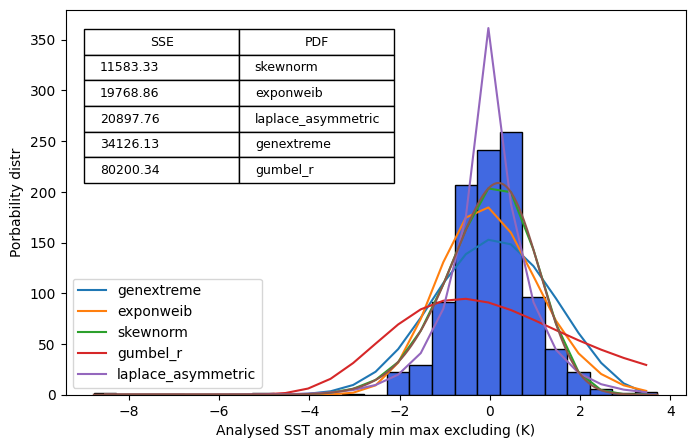

In [129]:
import scipy.stats as st
from scipy.stats import skewnorm 
from tqdm import tqdm

# testing the PDF fitting on time series 
def fit_all(array, bins, plot_hist=True, plot_best_fit=True, plot_all_fits=True):
    #     if plot_best_fit or plot_all_fits:
    #         assert plot_hist,"PLot hist must be true"
    
    y, x= np.histogram(np.array(array), bins=bins)
    bin_width=x[1]-x[0]
    N =len(array)
    x_mid= (x+np.roll(x,-1))[:-1]/2
    
    distri =[st.genextreme, st.exponweib, st.skewnorm, st.gumbel_r,st.laplace_asymmetric]

    plt_id=221
    if plot_hist:
        fig, axs=plt.subplots() 
        axs.hist(np.array(array), bins=bins,density=False , linestyle=('solid'),rwidth=1,edgecolor='black', color='royalblue',histtype='barstacked')
       
    
    sss=[]
    for i in tqdm(distri):
        name = i.__class__.__name__[:-4]
        param= i.fit(np.array(array))
        alpha=param[:-2]
        loc=param [-2]
        scale=param[-1]
        pdf=i.pdf(x_mid, loc=loc, scale=scale,*alpha )
        pdf_scale = pdf*bin_width*N
        sse = np.round(np.sum((y-pdf_scale)**2), decimals=2)
        sss.append([sse, name])
        if plot_all_fits:
            plt.plot(x_mid, pdf_scale,label=name)

    results= pd.DataFrame(sss, columns=["SSE","PDF"]).sort_values(by='SSE')
    best_name= results.iloc[0]["PDF"]
    best_dist= getattr(st, best_name)
    best_params=best_dist.fit(np.array(array))

    if plot_all_fits:
        plt.legend(loc="lower left")
        axs.set_xlabel("Analysed SST anomaly min max excluding (K)")
        axs.set_ylabel("Porbability distr")
    
    if plot_best_fit:
        z=np.linspace(min(array), max(array),num=len(array), endpoint=True)
        best_pdf= best_dist.pdf(z, *best_params[:-2],loc=best_params[-2], scale=best_params[-1])
        best_pdf_scale= best_pdf*bin_width *N
        axs.plot(z, best_pdf_scale, label=best_name)
        axs.table(cellText=results.values, colLabels=results.columns, cellLoc='left', loc='upper left',bbox=[0.03, 0.55,0.5, 0.4])
        #fig.tight_layout()
        fig.set_figwidth(8)
        fig.set_figheight(5)
    
    if plot_hist:
        path="/work/cmcc/mg13420/plot_exercises/sst_pdf-exps/sst-pdf_figs/"
        plt.savefig(path+"best_pdf_fit_analysed_sst_min_max_excld_2018_2023.jpeg", dpi=200)
        
    return results, best_name, best_params


sss, best_name, best_params= fit_all(excld_list1[0], bins=25,plot_best_fit=True  )
print("Probable best fit", best_name)
print(sss)
print(best_params)

In [64]:
sss

,SSS,Distribution
4,9792.018398,laplace_asymmetric
2,84075.662435,skewnorm
0,555016.724392,genextreme
3,593867.324887,gumbel_r
1,602609.218039,exponweib


In [35]:
(np.array(sst_list[0], dtype=np.float16))

array([ 0.1866 ,  0.4233 ,  0.4683 , ...,  0.09   ,  0.04166, -0.145  ],
      dtype=float16)